In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset
bank_note_data = pd.read_csv("/content/sample_data/BankNote_Authentication.csv")

In [4]:
bank_note_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
bank_note_data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
bank_note_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
bank_note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
bank_note_data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [9]:
bank_note_data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [10]:
bank_note_data.shape

(1372, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26866750d0>,
      dtype=object)

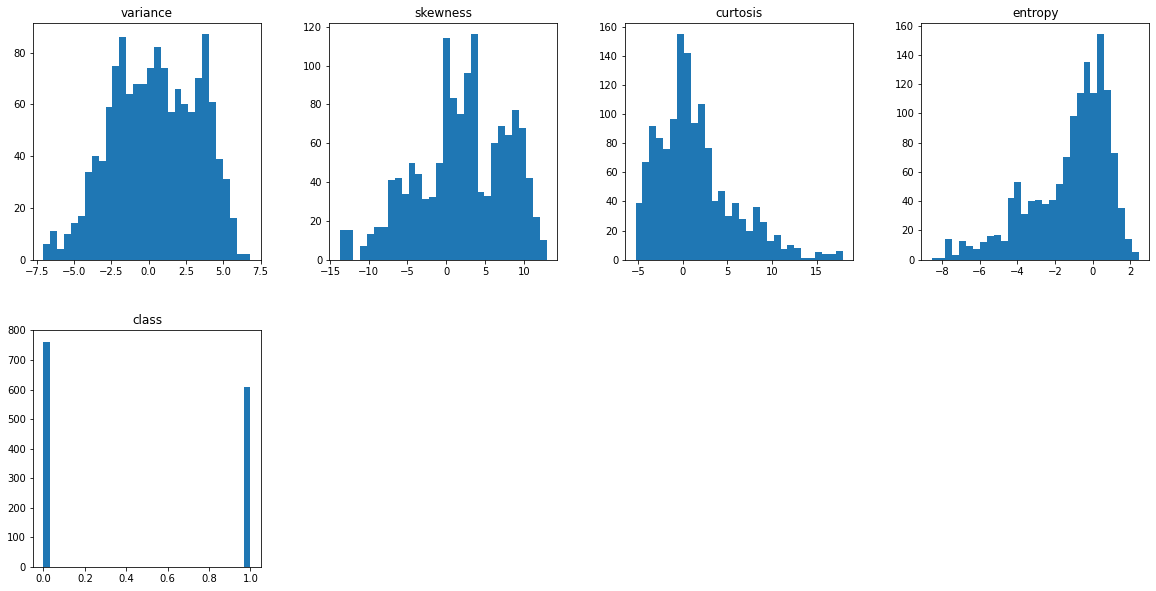

In [11]:
bank_note_data.hist(figsize=(20,10), grid =False, layout = (2,4), bins=30)

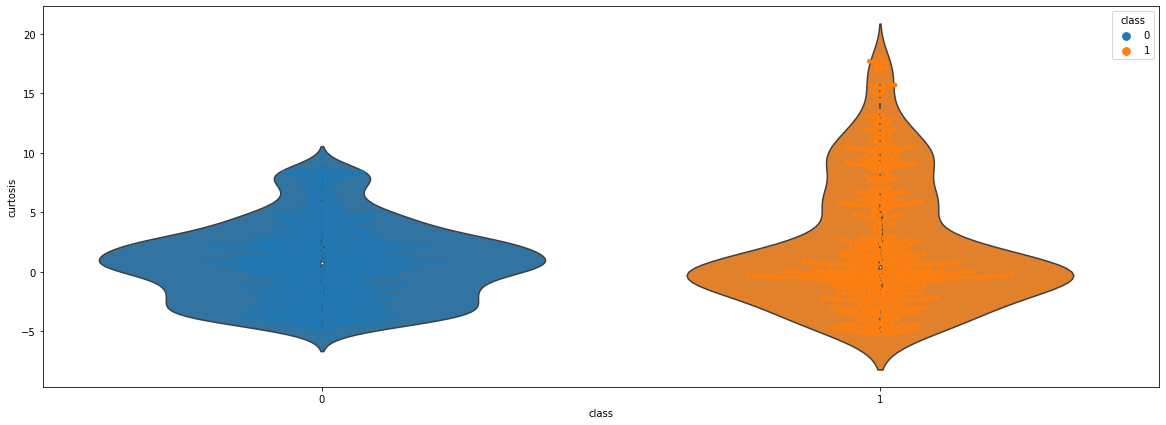

In [13]:
import seaborn as sns
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'class', y = 'curtosis', data = bank_note_data, hue = 'class')
sns.violinplot(x = 'class', y = 'curtosis', data = bank_note_data)

In [14]:
#Standardize rows into uniform scale.

X= bank_note_data.drop(['class'], axis=1)
y= bank_note_data['class']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

#Scale and centre the data

bank_note_data_normalized = scaler.transform(X)

#Create a pandas dataframe

bank_note_data_normalized = pd.DataFrame(data = X, index= X.index, columns= X.columns)

In [15]:
bank_note_data_normalized.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify=bank_note_data['class'])

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


In [23]:
#Create a Sequential model
from keras.layers import Dropout
model = tf.keras.Sequential()
model.add(Dropout(0.2, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

#Create a Keras version Optimiser
optimizer = tf.keras.optimizers.Adam()

#Compile and print the summary of model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics =['accuracy'])



In [25]:
input_shape = X.shape  
model.build(input_shape) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_2 (ModuleWrap (1372, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (1372, 100)               500       
_________________________________________________________________
dense_8 (Dense)              (1372, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (1372, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


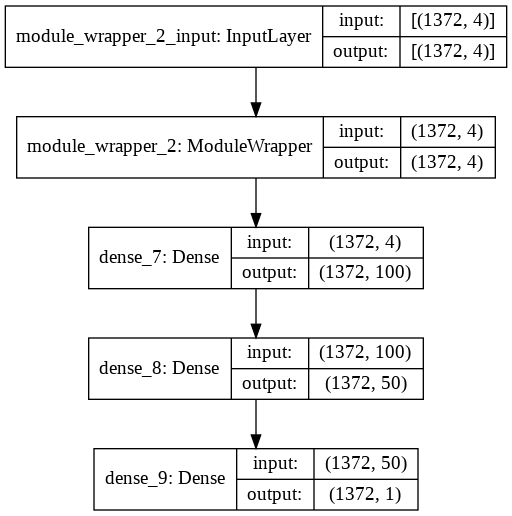

In [26]:
#Plot model summary

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
# Compiling the model
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
77/77 [==============================] - 1s 4ms/step - loss: 0.1767 - accuracy: 0.9245 - val_loss: 0.0467 - val_accuracy: 0.9948
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9180 - val_loss: 0.0593 - val_accuracy: 0.9948
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1695 - accuracy: 0.9232 - val_loss: 0.0455 - val_accuracy: 0.9948
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9154 - val_loss: 0.0505 - val_accuracy: 0.9896
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9284 - val_loss: 0.0754 - val_accuracy: 0.9844
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9375 - val_loss: 0.0417 - val_accuracy: 0.9948
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9271 - val_loss: 0.0627 - val_accuracy: 0.9896
Epoch 8/100
7

In [35]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9976


[0.02671539969742298, 0.9975728392601013]

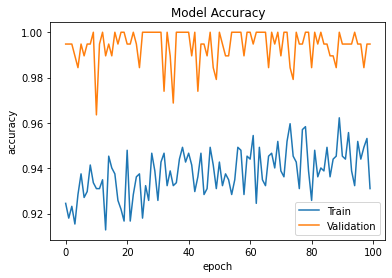

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

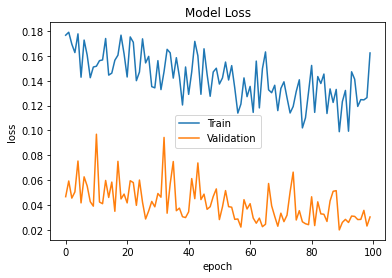

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()